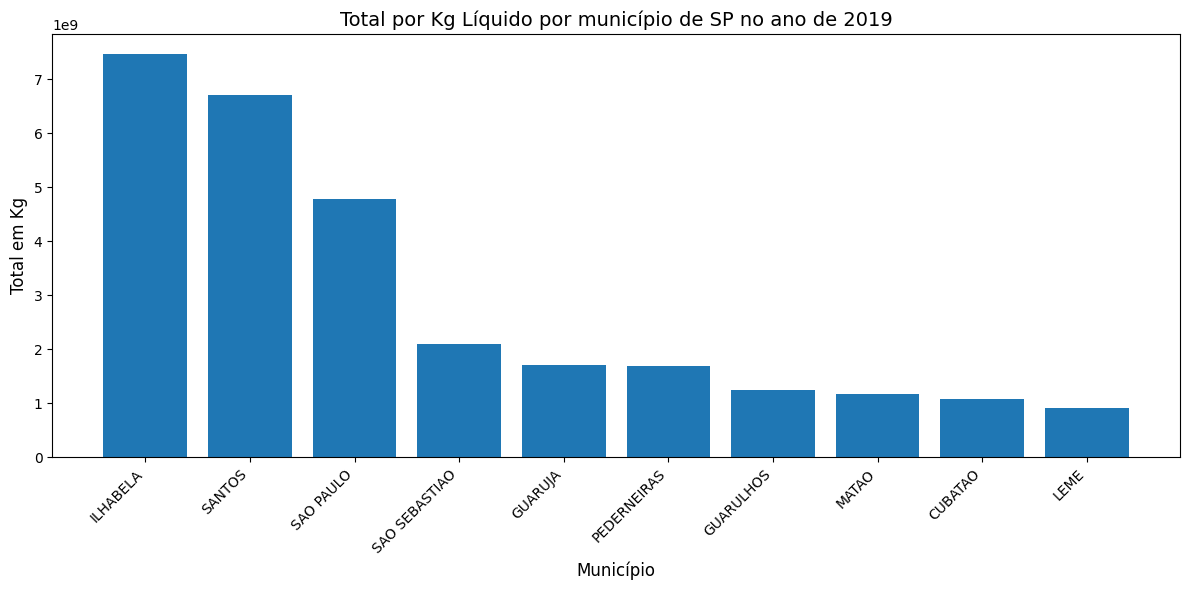

            NO_MUN  TOTAL_KG_LIQUIDO   CO_MUN
163       ILHABELA        7463789737  3420400
370         SANTOS        6714640513  3448500
383      SAO PAULO        4780872961  3450308
389  SAO SEBASTIAO        2097101438  3450704
388  SAO SEBASTIAO        2097101438  2708808
147        GUARUJA        1711580170  3418701
282    PEDERNEIRAS        1695290507  3436703
148      GUARULHOS        1250716234  3418800
228          MATAO        1170128680  3429302
109        CUBATAO        1079444954  3413504
210           LEME         913081175  3426704


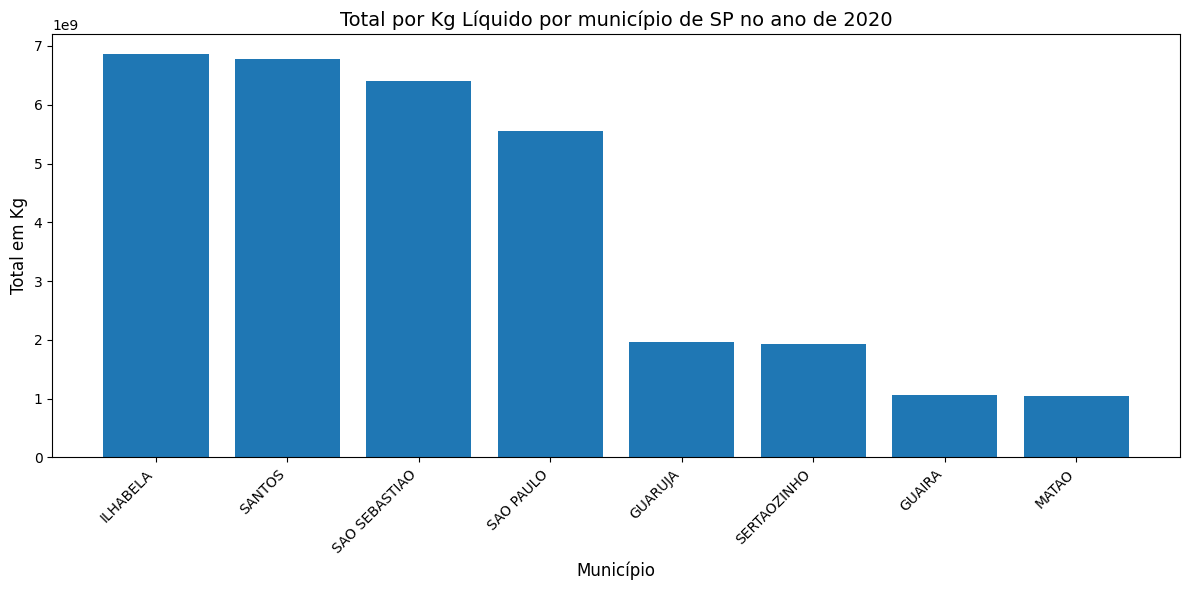

            NO_MUN  TOTAL_KG_LIQUIDO   CO_MUN
162       ILHABELA        6862401943  3420400
376         SANTOS        6776282893  3448500
394  SAO SEBASTIAO        6406117395  2708808
395  SAO SEBASTIAO        6406117395  3450704
389      SAO PAULO        5549295040  3450308
148        GUARUJA        1966363567  3418701
406    SERTAOZINHO        1935723532  3451702
405    SERTAOZINHO        1935723532  2515930
139         GUAIRA        1055149805  4108809
138         GUAIRA        1055149805  3417406
226          MATAO        1050908847  3429302


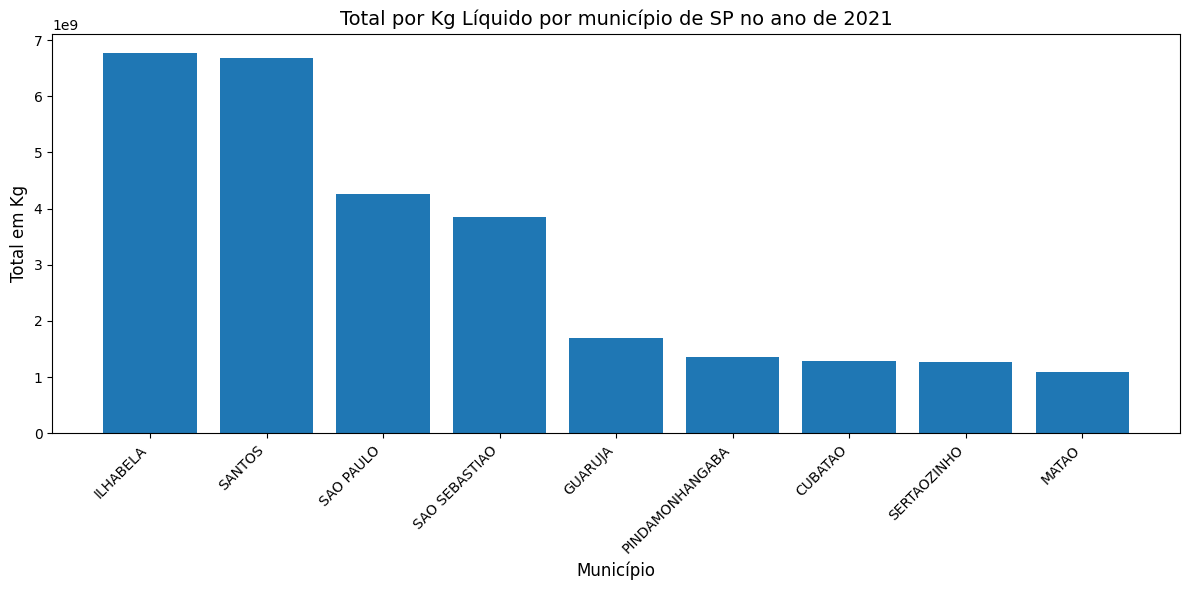

              NO_MUN  TOTAL_KG_LIQUIDO   CO_MUN
169         ILHABELA        6771216253  3420400
384           SANTOS        6671637492  3448500
398        SAO PAULO        4257836665  3450308
403    SAO SEBASTIAO        3852625024  2708808
404    SAO SEBASTIAO        3852625024  3450704
155          GUARUJA        1700444518  3418701
297  PINDAMONHANGABA        1365319983  3438006
116          CUBATAO        1281719497  3413504
414      SERTAOZINHO        1268603358  3451702
413      SERTAOZINHO        1268603358  2515930
232            MATAO        1083914721  3429302


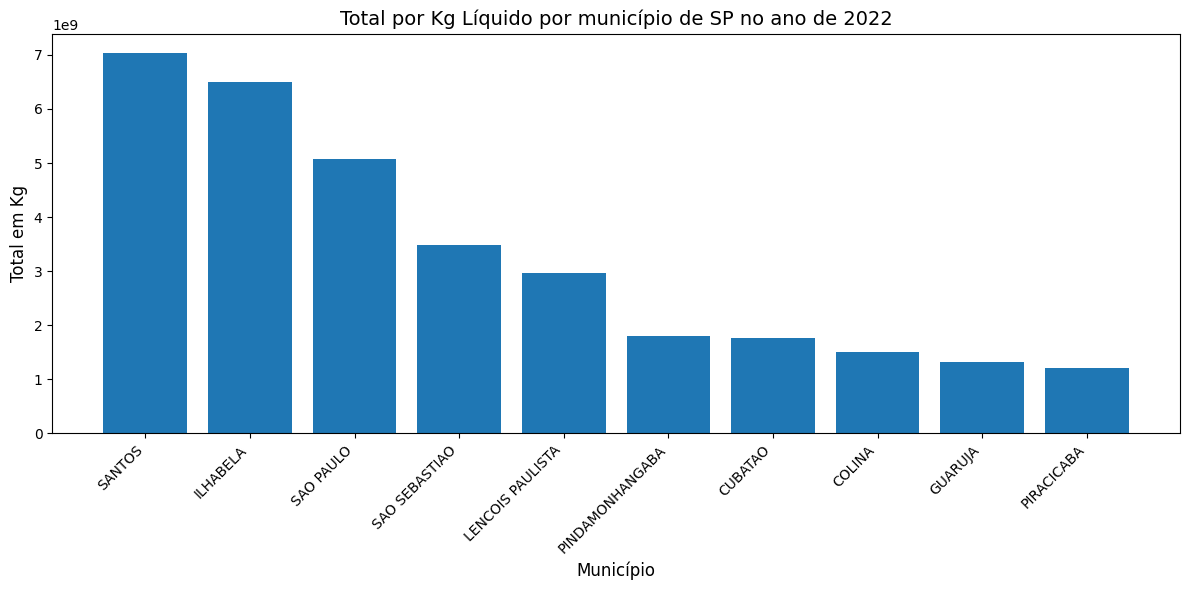

               NO_MUN  TOTAL_KG_LIQUIDO   CO_MUN
394            SANTOS        7037728598  3448500
173          ILHABELA        6506074641  3420400
408         SAO PAULO        5078525819  3450308
413     SAO SEBASTIAO        3476221594  2708808
414     SAO SEBASTIAO        3476221594  3450704
219  LENCOIS PAULISTA        2960569223  3426803
305   PINDAMONHANGABA        1804650921  3438006
119           CUBATAO        1764507029  3413504
106            COLINA        1505725820  3412001
159           GUARUJA        1326082561  3418701
308        PIRACICABA        1205842651  3438709


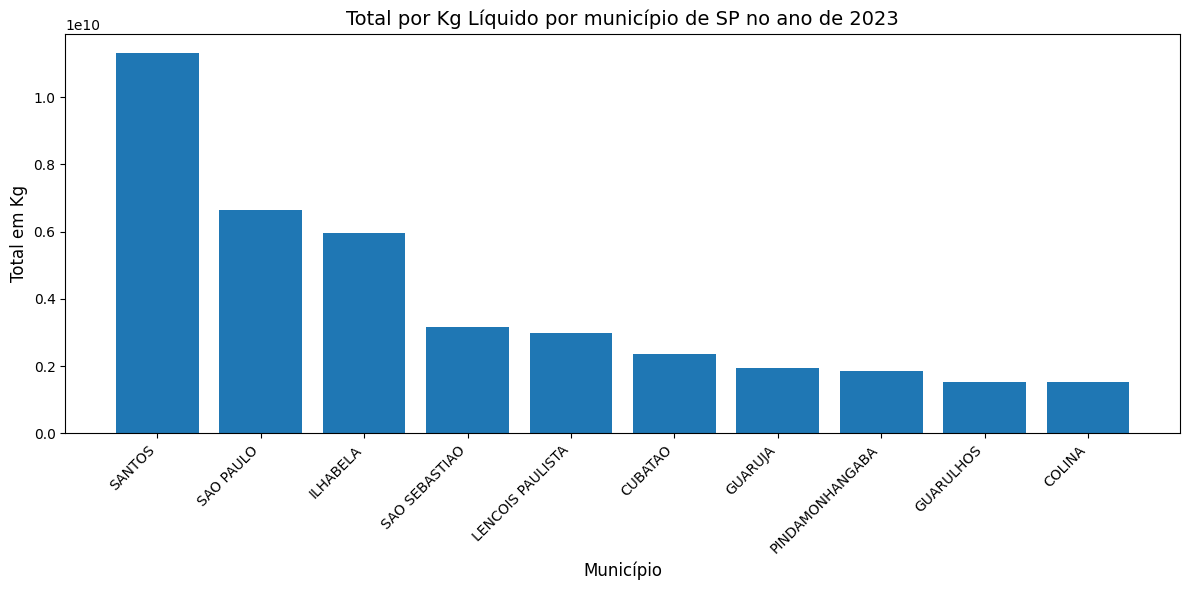

               NO_MUN  TOTAL_KG_LIQUIDO   CO_MUN
402            SANTOS       11313125196  3448500
416         SAO PAULO        6635756171  3450308
177          ILHABELA        5943762113  3420400
421     SAO SEBASTIAO        3148613948  2708808
422     SAO SEBASTIAO        3148613948  3450704
227  LENCOIS PAULISTA        2975779334  3426803
117           CUBATAO        2356851780  3413504
161           GUARUJA        1934351003  3418701
313   PINDAMONHANGABA        1862834324  3438006
162         GUARULHOS        1515770288  3418800
104            COLINA        1514056138  3412001


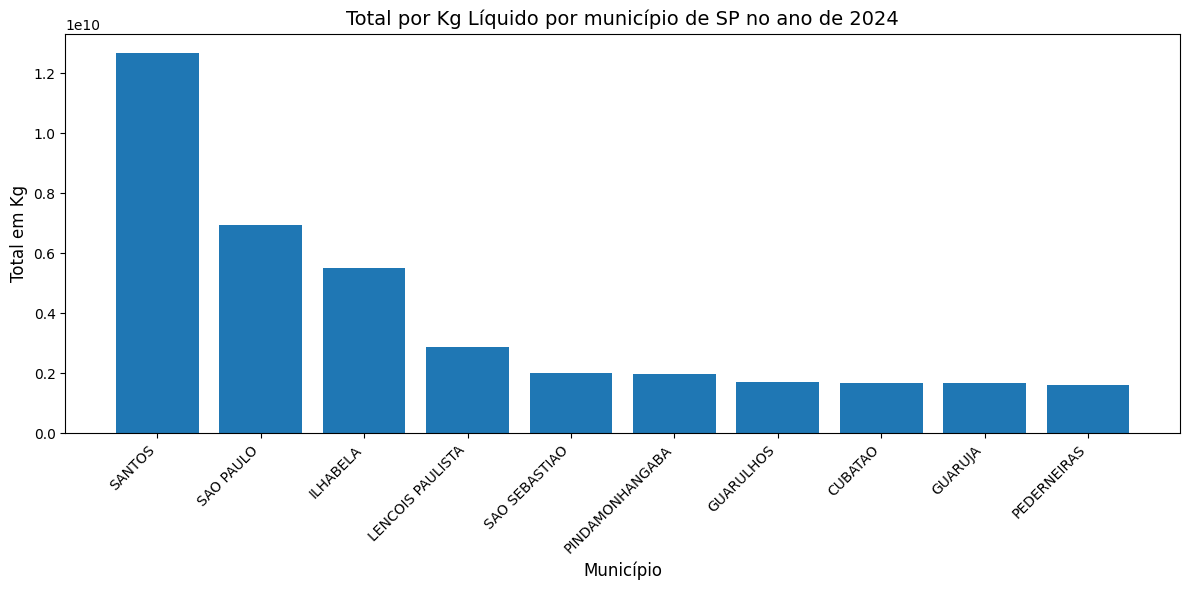

               NO_MUN  TOTAL_KG_LIQUIDO   CO_MUN
402            SANTOS       12676277225  3448500
416         SAO PAULO        6952426176  3450308
179          ILHABELA        5515879771  3420400
227  LENCOIS PAULISTA        2862236003  3426803
421     SAO SEBASTIAO        2004354200  2708808
422     SAO SEBASTIAO        2004354200  3450704
315   PINDAMONHANGABA        1988027495  3438006
163         GUARULHOS        1697474007  3418800
117           CUBATAO        1680868459  3413504
162           GUARUJA        1661748543  3418701
305       PEDERNEIRAS        1601060093  3436703


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mun = 'https://balanca.economia.gov.br/balanca/bd/tabelas/UF_MUN.csv'
sh4 = 'https://balanca.economia.gov.br/balanca/bd/tabelas/NCM_SH.csv'
pais = 'https://balanca.economia.gov.br/balanca/bd/tabelas/PAIS.csv'

df_mun = pd.read_csv(mun, sep=";", encoding="latin1")
df_sh4 = pd.read_csv(sh4, sep=";", encoding="latin1")
df_pais = pd.read_csv(pais, sep=";", encoding="latin1")


for year in range(2019,2025):
    url = f'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_{year}_MUN.csv'
    df = pd.read_csv(url, sep=";", encoding="latin1")

    ## TOP 10 MUNICIPIOS POR TOTAL KG DE EXPORTAÇÃO

    # RENOMEAR PARA SER COMPATIVEL COM BASE MUN
    df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

    # APENAS ESTADO DE SP // MESCLAR COM A TABELA DE MUN PARA PEGAR OS NOMES
    df_mun_sp = df[df["SG_UF_MUN"] == "SP"]
    df_mun_sp = pd.merge(df_mun_sp, df_mun[['CO_MUN', 'NO_MUN']], on='CO_MUN', how='left')

    # SOMA DO TOTAL DE KG_LIQUIDO POR MUNICÍPIO
    kg_total_por_mun = df_mun_sp.groupby("NO_MUN")["KG_LIQUIDO"].sum().reset_index()
    kg_total_por_mun = kg_total_por_mun.rename(columns={"KG_LIQUIDO": "TOTAL_KG_LIQUIDO"}) # renomeado para melhor compreensão


    kg_total_por_mun = pd.merge(kg_total_por_mun, df_mun[['CO_MUN', 'NO_MUN']], on='NO_MUN', how='left')
    municipios_top10 = kg_total_por_mun.sort_values(by="TOTAL_KG_LIQUIDO", ascending=False).head(11)

    # grafico
    plt.figure(figsize=(12, 6))
    plt.bar(municipios_top10['NO_MUN'], municipios_top10['TOTAL_KG_LIQUIDO'])

    # Customize the plot
    plt.title(f'Total por Kg Líquido por município de SP no ano de {year}', fontsize=14)
    plt.xlabel('Município', fontsize=12)
    plt.ylabel('Total em Kg', fontsize=12)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()

    # Show the plot
    plt.show()

    print(municipios_top10)
